<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train (1).csv', na_values=' ') #пропуски в таблице представлены пробелами
data_test = pd.read_csv('./test.csv', na_values=' ')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
data['TotalSpent'].replace(" ",np.nan,inplace=True)

In [7]:
print('количество пропусков в колокне "TotalSpent" -',data['TotalSpent'].isna().sum()) #всего 9 пропусков в колонке

количество пропусков в колокне "TotalSpent" - 9


In [8]:
data['TotalSpent'].fillna(data['TotalSpent'].median(),inplace=True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [9]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

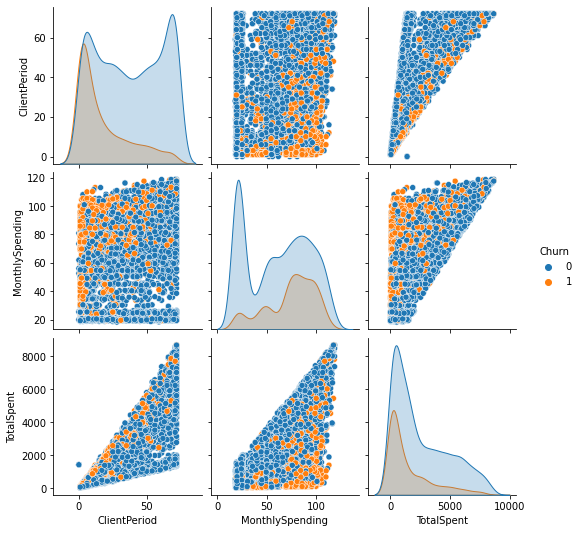

In [10]:
sns.pairplot(data.drop(data[cat_cols],axis=1),hue='Churn')

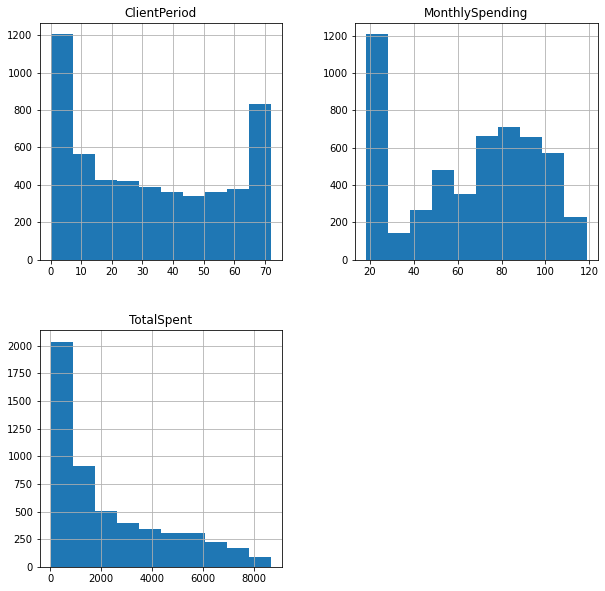

In [26]:
data.drop(data[cat_cols],axis=1).drop(target_col,axis=1).hist(figsize=(10,10))
None

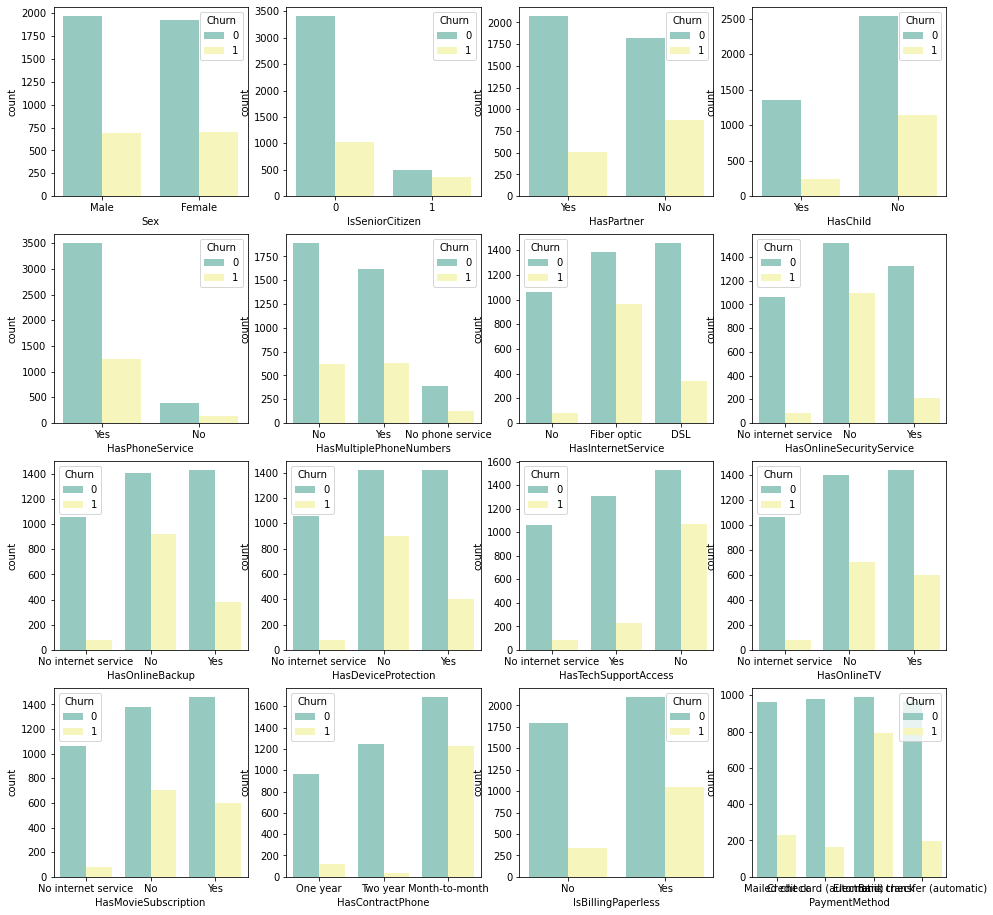

In [29]:
fig,axes=plt.pyplot.subplots(4,4,figsize=(16,16))
k=0
for i in range(4):
  for j in range(4):
    sns.countplot(x=cat_cols[k],data=data,hue='Churn', palette="Set3",ax=axes[i][j])
    k+=1

fig.show()

In [14]:
data[num_cols].corr()

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.000000,0.249414,0.825871
MonthlySpending,0.249414,1.000000,0.651838
TotalSpent,0.825871,0.651838,1.000000


Text(0, 0.5, 'TotalSpent')

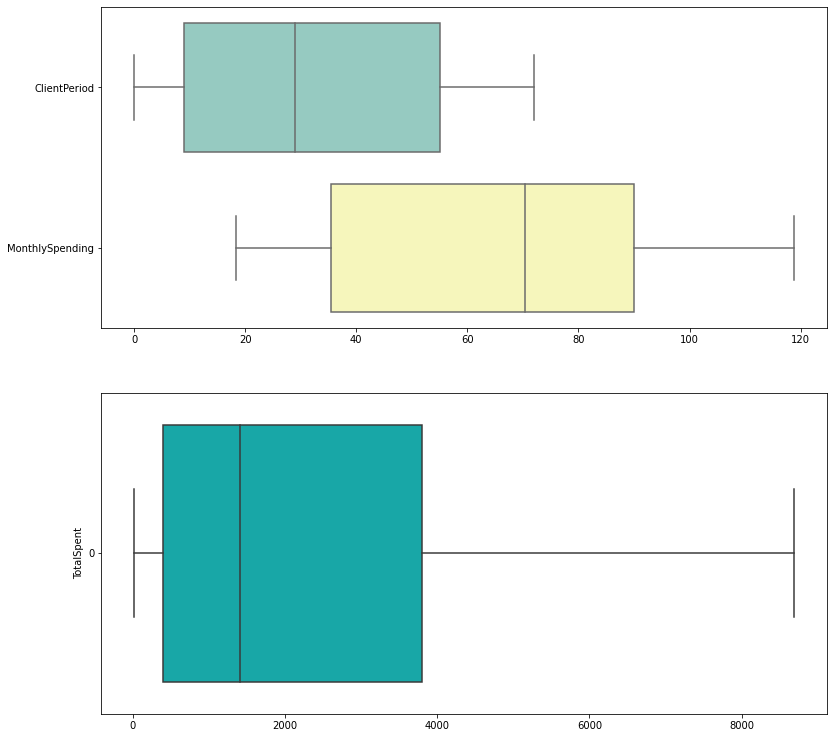

In [24]:
#for column in data.columns[:3]:
fig,axes=plt.pyplot.subplots(2,1,figsize=(13,13))

sns.boxplot(data=data[num_cols[:-1]],orient='h',ax=axes[0],palette="Set3")
sns.boxplot(data=data[num_cols[-1]],orient='h',ax=axes[1],color='c')
axes[1].set_ylabel('TotalSpent')

In [16]:
data[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

In [186]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Churn',axis=1),data['Churn'],random_state=42,test_size=0.25,stratify=data['Churn'])

In [153]:
scaler=StandardScaler()

In [187]:
X_train=pd.concat([X_train[num_cols],pd.get_dummies(X_train[cat_cols],drop_first=True)],axis=1)
X_test=pd.concat([X_test[num_cols],pd.get_dummies(X_test[cat_cols],drop_first=True)],axis=1)

X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])
#ручная предобработка данных

In [ ]:
regressor=LogisticRegressionCV(cv=5,random_state=42,scoring='roc_auc',refit=True,solver='saga')
regressor.fit(X_train,y_train)

In [191]:
print(f'результы LogRegCV без Pipeline на тесте: {roc_auc_score(y_train,(regressor.predict_proba(X_train)).T[1])}')
print(f'результы LogRegCV без Pipeline на тесте: {roc_auc_score(y_test,(regressor.predict_proba(X_test)).T[1])}')

результы LogRegCV без Pipeline на тесте: 0.8489575402577524
результы LogRegCV без Pipeline на тесте: 0.8464191492515193


In [192]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Churn',axis=1),data['Churn'],random_state=42,test_size=0.25,stratify=data['Churn'])

In [193]:
ct=ColumnTransformer([('one_hot_encoder', OneHotEncoder(sparse=False),cat_cols )],   
    remainder='passthrough'   )
#необходимые преобразования для создания пайплайна

In [180]:
preprop_pipe=Pipeline([('ohe',ct),('scaler',StandardScaler())])

In [181]:
pipeline=Pipeline([('preprop',preprop_pipe),('regressor',LogisticRegression())])

In [ ]:
param_grid = [{'regressor__C': [0.01,0.1,1, 10, 100, 1000]}]
gs = GridSearchCV(pipeline, param_grid=param_grid,scoring='roc_auc',refit=True,n_jobs=-1) 
gs.fit(X_train, y_train) 

In [198]:
hold_roc=roc_auc_score(y_test,gs.best_estimator_.predict_proba(X_test)[:,1])
print(f"Best Roc_cv={gs.best_score_} on params: {gs.best_params_}")
print(f"Best Roc_test={hold_roc} on params: {gs.best_params_}")

Best Roc_cv=0.8427560956330561 on params: {'regressor__C': 10}
Best Roc_test=0.8465584704313028 on params: {'regressor__C': 10}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [199]:
!pip install catboost
import catboost
from catboost import CatBoostClassifier

In [204]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Churn',axis=1),data['Churn'],random_state=42,test_size=0.25,stratify=data['Churn'])

In [200]:
caty=CatBoostClassifier(cat_features=cat_cols)
None

In [201]:
grid_params = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10]}#,
        #'l2_leaf_reg': [1, 3, 5, 7, 9]}
gs = GridSearchCV(caty,grid_params, scoring='roc_auc',n_jobs=-1,refit=True)

In [ ]:
gs.fit(X_train,y_train)

In [206]:
hold_roc=roc_auc_score(y_test,gs.best_estimator_.predict_proba(X_test)[:,1])
print(f"Best Roc_cv={gs.best_score_} on params: {gs.best_params_}")
print(f"Best Roc_test={hold_roc} on params: {gs.best_params_}")

Best Roc_cv=0.8413096474008729 on params: {'depth': 4, 'learning_rate': 0.03}
Best Roc_test=0.8460708463020601 on params: {'depth': 4, 'learning_rate': 0.03}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [208]:
best_model = gs

In [209]:
X_test = pd.read_csv('./test.csv',na_values=' ')
X_test['TotalSpent'].replace(" ",np.nan,inplace=True)
X_test.fillna(X_test['TotalSpent'].median(),inplace=True)

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.best_estimator_.predict_proba(X_test).T[1]# / best_model.predict(X_test)
submission.to_csv('./my_submission.csv',index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.